# Proyek Klasifikasi Bunga Iris

Notebook ini berisi panduan langkah demi langkah untuk melakukan klasifikasi spesies bunga Iris menggunakan algoritma K-Nearest Neighbors (KNN).

**Cara menggunakan di Google Colab:**
1. Pastikan Anda sudah mendownload file `iris.data` dari [UCI Repository](https://archive.ics.uci.edu/dataset/53/iris).
2. Jalankan setiap sel (kotak kode) di bawah ini secara berurutan dengan menekan tombol **Play**.

## Langkah 1: Import Library
Kita memanggil library `pandas` (data tabel), `matplotlib` & `seaborn` (grafik), dan `sklearn` (machine learning).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from google.colab import files  # Library khusus Colab untuk upload file
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

## Langkah 2: Upload dan Membaca Data
Silakan upload file `iris.data` yang sudah Anda unduh. Program akan membaca file tersebut dan memberikan nama kolom yang sesuai.

In [2]:
print("=== LANGKAH UPLOAD FILE ===")
print("Silakan upload file 'iris.data' atau 'iris.csv' yang Anda unduh dari UCI.")
print("Link download: https://archive.ics.uci.edu/dataset/53/iris (klik tombol 'Download')")
print("---------------------------------------------------------")

# Memunculkan tombol upload
uploaded = files.upload()

# Mengambil nama file yang baru saja diupload
filename = next(iter(uploaded))

# Membaca file CSV
# Kita beri nama kolom secara manual karena data UCI tidak punya header
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv(io.BytesIO(uploaded[filename]), header=None, names=column_names)

print(f"\nBerhasil membaca file: {filename}")
print("=== 5 Baris Pertama Data ===")
df.head() # Menampilkan data teratas

=== LANGKAH UPLOAD FILE ===
Silakan upload file 'iris.data' atau 'iris.csv' yang Anda unduh dari UCI.
Link download: https://archive.ics.uci.edu/dataset/53/iris (klik tombol 'Download')
---------------------------------------------------------


Saving iris.data to iris.data

Berhasil membaca file: iris.data
=== 5 Baris Pertama Data ===


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Langkah 3: Visualisasi Data (Eksplorasi)
Melihat pola penyebaran data menggunakan Scatter Plot.

=== Menampilkan Grafik Sebaran Data ===


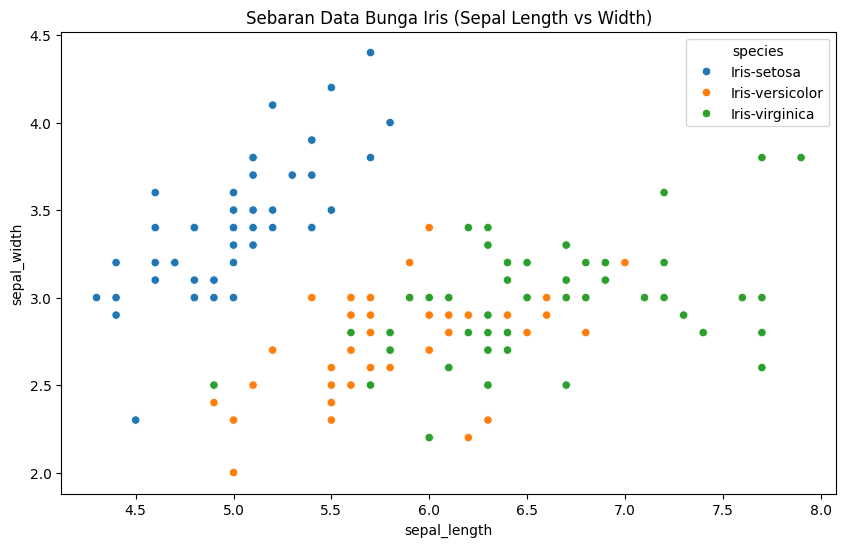

In [3]:
print("=== Menampilkan Grafik Sebaran Data ===")
plt.figure(figsize=(10, 6))

# Membuat scatter plot
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df)

plt.title('Sebaran Data Bunga Iris (Sepal Length vs Width)')
plt.show()

## Langkah 4: Membagi Data (Splitting)
Memisahkan data menjadi **Fitur (X)** dan **Target (y)**, lalu membaginya menjadi data Latihan (80%) dan Ujian (20%).

In [4]:
# X = Fitur (4 kolom pertama)
# y = Target (kolom spesies)
X = df.drop('species', axis=1)
y = df['species']

# Membagi data: 80% Latihan, 20% Ujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Jumlah Data Latihan: {len(X_train)}")
print(f"Jumlah Data Testing: {len(X_test)}")

Jumlah Data Latihan: 120
Jumlah Data Testing: 30


## Langkah 5: Melatih Model (Training)
Melatih algoritma KNN dengan data latihan.

In [5]:
# Membuat model KNN
model = KNeighborsClassifier(n_neighbors=3)

# Melatih model dengan data latihan
model.fit(X_train, y_train)

print("Model berhasil dilatih!")

Model berhasil dilatih!


## Langkah 6: Evaluasi Akurasi
Menguji performa model dengan data testing.

In [6]:
# Meminta model menebak data ujian
y_pred = model.predict(X_test)

# Menghitung skor akurasi
akurasi = accuracy_score(y_test, y_pred)

print(f"=== HASIL AKURASI MODEL: {akurasi * 100:.2f}% ===")
print("\nLaporan Klasifikasi Lengkap:")
print(classification_report(y_test, y_pred))

=== HASIL AKURASI MODEL: 100.00% ===

Laporan Klasifikasi Lengkap:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



## Langkah 7: Tes Prediksi Manual
Mencoba memprediksi spesies bunga baru dengan data inputan manual.

In [7]:
print("=== Coba Prediksi 3 Jenis Bunga Sekaligus ===")

# Kita definisikan nama kolomnya
nama_kolom = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Kita buat 3 contoh inputan berbeda:
# Data 1: Angka kecil (Ciri khas Setosa)
# Data 2: Angka sedang (Ciri khas Versicolor)
# Data 3: Angka besar (Ciri khas Virginica)
input_angka = [
    [5.1, 3.5, 1.4, 0.2],
    [5.9, 3.0, 4.2, 1.5],
    [6.9, 3.1, 5.4, 2.1]
]

# Ubah menjadi DataFrame (Tabel dengan nama kolom)
data_baru = pd.DataFrame(input_angka, columns=nama_kolom)

# Prediksi sekaligus
hasil_prediksi = model.predict(data_baru)

print(f"Data Input:\n{data_baru}")
print("\n=== Hasil Prediksi Model ===")

# Loop untuk menampilkan hasil satu per satu
for i, hasil in enumerate(hasil_prediksi):
    print(f"Data ke-{i+1} diprediksi sebagai: {hasil}")

=== Coba Prediksi 3 Jenis Bunga Sekaligus ===
Data Input:
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           5.9          3.0           4.2          1.5
2           6.9          3.1           5.4          2.1

=== Hasil Prediksi Model ===
Data ke-1 diprediksi sebagai: Iris-setosa
Data ke-2 diprediksi sebagai: Iris-versicolor
Data ke-3 diprediksi sebagai: Iris-virginica
